<a href="https://colab.research.google.com/github/arungeethanbk/AL-Project---corizo/blob/main/Brain%20Tumor%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='IPython.core.pylabtools')
#FOR MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning
#FOR DEEP LEARNING
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



In [4]:
df = pd.read_csv('Brain_Tumor_Prediction_Dataset.csv')
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Blood_Pressure       250000 non-null  object 
 13  Diabetes             250000 non-null  object 
 14  Tumor_Type           250000 non-null  object 
 15  Treatment_Receive

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250000.0,46.962424,24.517143,5.0,26.00,47.00,68.00,89.0
Tumor_Size,250000.0,5.251768,2.742576,0.5,2.87,5.26,7.63,10.0
Genetic_Risk,250000.0,49.998916,29.178031,0.0,25.00,50.00,75.00,100.0
Survival_Rate(%),250000.0,54.481532,25.999932,10.0,32.00,55.00,77.00,99.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Gender,250000,3,Male,83407
Country,250000,12,Brazil,20985
Tumor_Location,250000,5,Parietal,50187
MRI_Findings,250000,3,Abnormal,83737
Smoking_History,250000,2,Yes,125150
Alcohol_Consumption,250000,2,Yes,125173
Radiation_Exposure,250000,3,Low,83513
Head_Injury_History,250000,2,Yes,125029
Chronic_Illness,250000,2,Yes,125321
Blood_Pressure,250000,5551,117/106,70


# Data Preprocessing

In [8]:
df['Blood_Pressure'].unique()

array(['122/88', '126/119', '118/65', ..., '180/63', '105/80', '155/69'],
      dtype=object)

In [9]:
df[['High_BP', 'Low_BP']] = df['Blood_Pressure'].str.split('/', expand = True).astype(int)
df.drop('Blood_Pressure', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Diabetes             250000 non-null  object 
 13  Tumor_Type           250000 non-null  object 
 14  Treatment_Received   187252 non-null  object 
 15  Survival_Rate(%) 

In [10]:
print('Missing Value (%)')
missing_values = df.isna().mean()*100
print(missing_values)
print('\nDuplicate Rows (%):')
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                     0.0000
Gender                  0.0000
Country                 0.0000
Tumor_Size              0.0000
Tumor_Location          0.0000
MRI_Findings            0.0000
Genetic_Risk            0.0000
Smoking_History         0.0000
Alcohol_Consumption     0.0000
Radiation_Exposure      0.0000
Head_Injury_History     0.0000
Chronic_Illness         0.0000
Diabetes                0.0000
Tumor_Type              0.0000
Treatment_Received     25.0992
Survival_Rate(%)        0.0000
Tumor_Growth_Rate       0.0000
Family_History          0.0000
Symptom_Severity        0.0000
Brain_Tumor_Present     0.0000
High_BP                 0.0000
Low_BP                  0.0000
dtype: float64

Duplicate Rows (%):
0.0


In [11]:
df['Treatment_Received'].unique()

array([nan, 'Chemotherapy', 'Radiation', 'Surgery'], dtype=object)

In [12]:
df['Treatment_Received'] = df['Treatment_Received'].fillna('No')
df['Treatment_Received'].unique()

array(['No', 'Chemotherapy', 'Radiation', 'Surgery'], dtype=object)

In [13]:
print('Missing Value (%)')
missing_values = df.isna().mean()*100
print(missing_values)

Missing Value (%)
Age                    0.0
Gender                 0.0
Country                0.0
Tumor_Size             0.0
Tumor_Location         0.0
MRI_Findings           0.0
Genetic_Risk           0.0
Smoking_History        0.0
Alcohol_Consumption    0.0
Radiation_Exposure     0.0
Head_Injury_History    0.0
Chronic_Illness        0.0
Diabetes               0.0
Tumor_Type             0.0
Treatment_Received     0.0
Survival_Rate(%)       0.0
Tumor_Growth_Rate      0.0
Family_History         0.0
Symptom_Severity       0.0
Brain_Tumor_Present    0.0
High_BP                0.0
Low_BP                 0.0
dtype: float64


In [14]:
from re import I
def outlier_check(row, colname):
  Q1 = row[colname].quantile(0.25)
  Q3 = row[colname].quantile(0.75)
  IQR = Q3 - Q1
  lower_b = Q1 - 1.5*IQR
  upper_b = Q3 + 1.5*IQR
  outlier = row.loc[(row[colname]< lower_b) | (row[colname]>upper_b)]
  return outlier
outliers = pd.DataFrame()
for col in df.select_dtypes(include =['number']).columns:
  outliers_in_col = outlier_check(df, col)
  outliers = pd.concat([outliers, outliers_in_col])
outliers.reset_index(drop = True, inplace = True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count/total_rows)*100
if outliers.empty:
   print('No outliers')
else:
   print(f'Number of Outliers: {outlier_count}')
   print(f'Outlier Ratio: {outlier_ratio:.2f}%')

No outliers


#EDA: Data Distribution

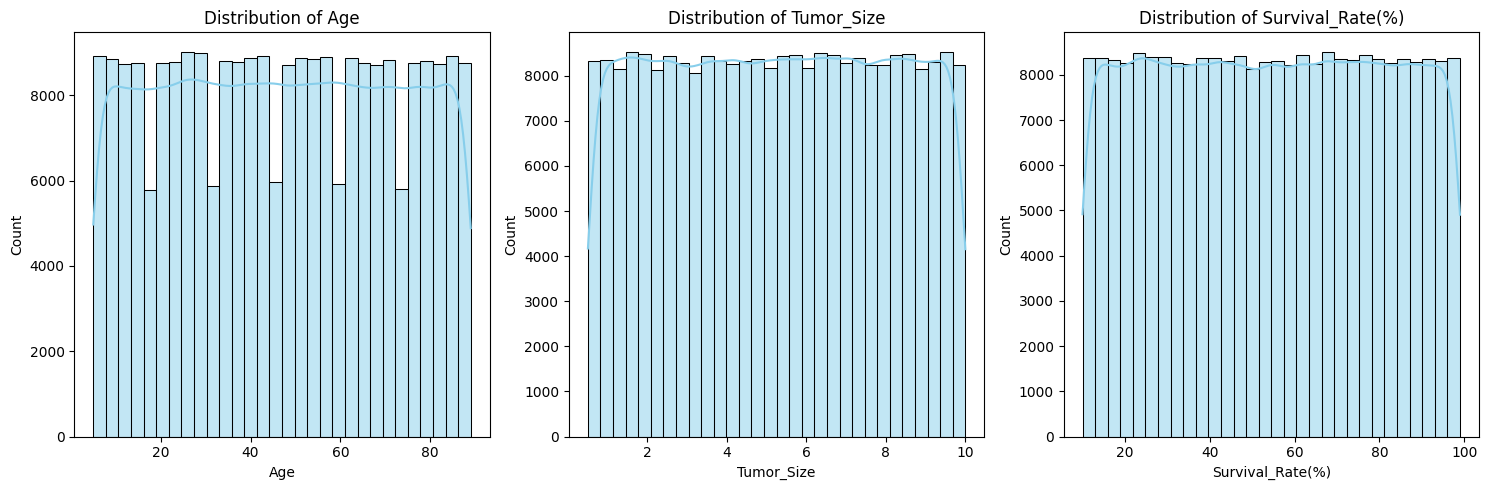

<ipython-input-15-9f20b4f7b385>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'pastel')
<ipython-input-15-9f20b4f7b385>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'pastel')
<ipython-input-15-9f20b4f7b385>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'pastel')


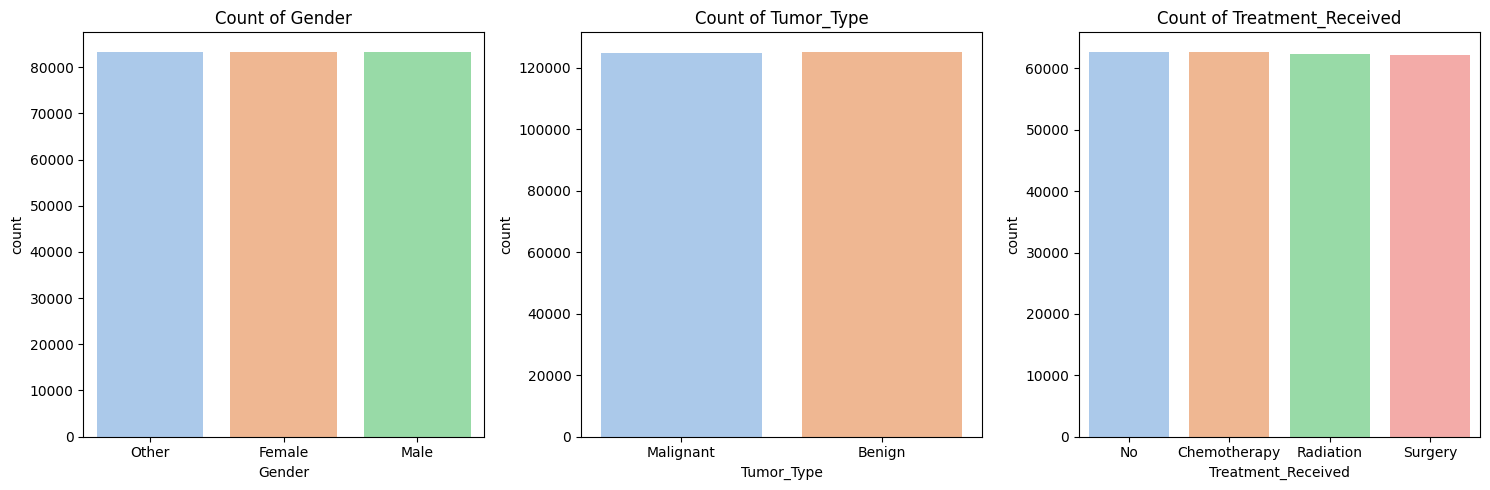

<ipython-input-15-9f20b4f7b385>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Tumor_Type', y ='Tumor_Size', palette = 'Set2')


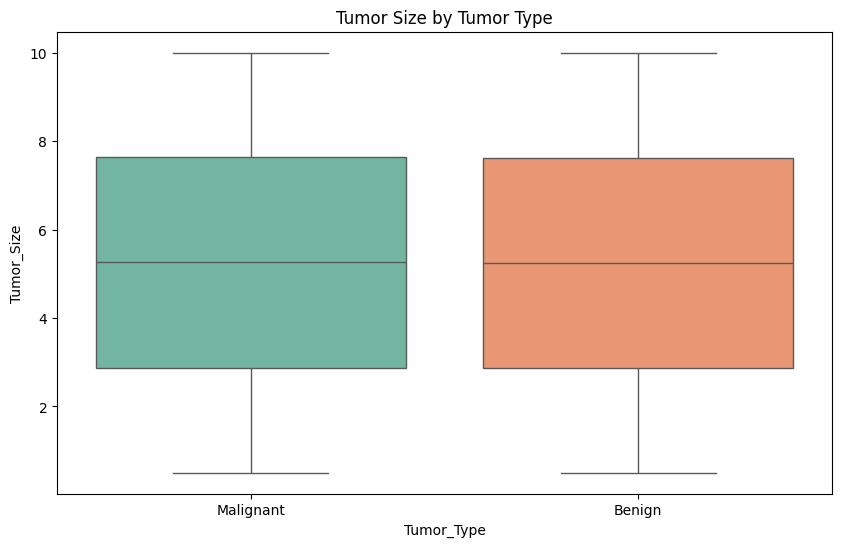

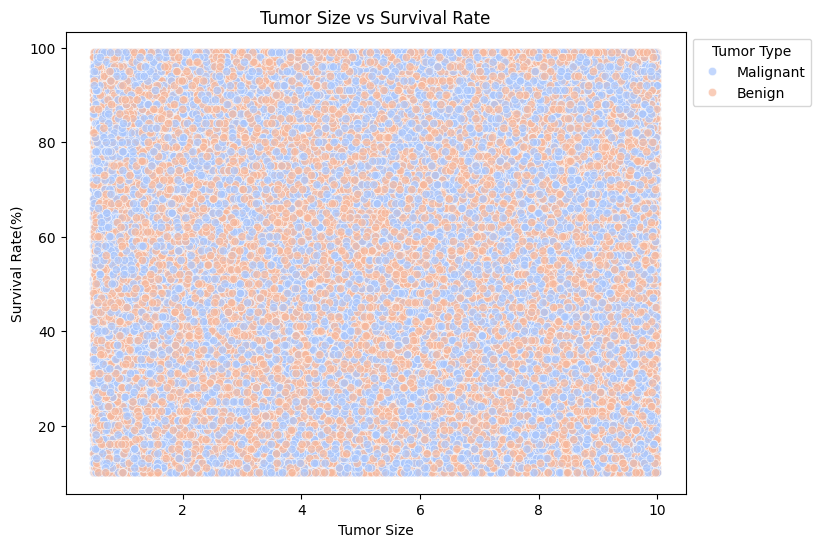

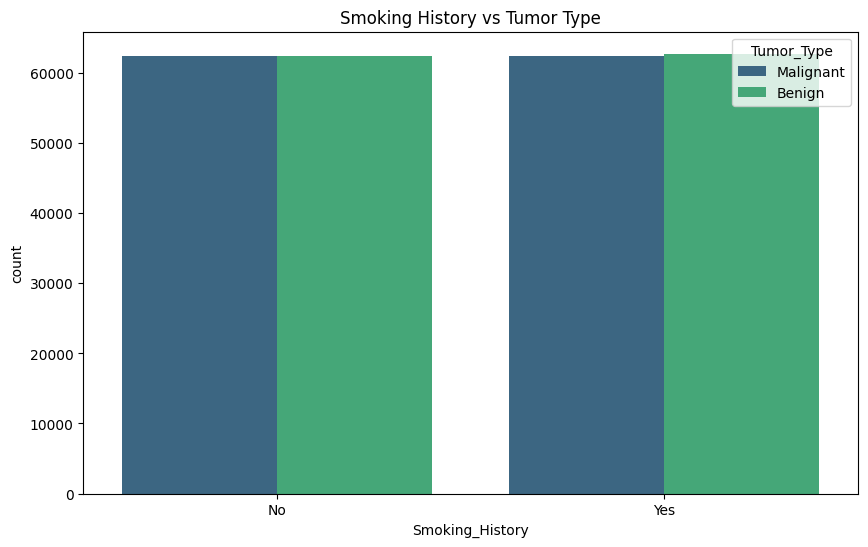

<ipython-input-15-9f20b4f7b385>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x ='Tumor_Growth_Rate', y = 'Tumor_Size', palette = 'muted')


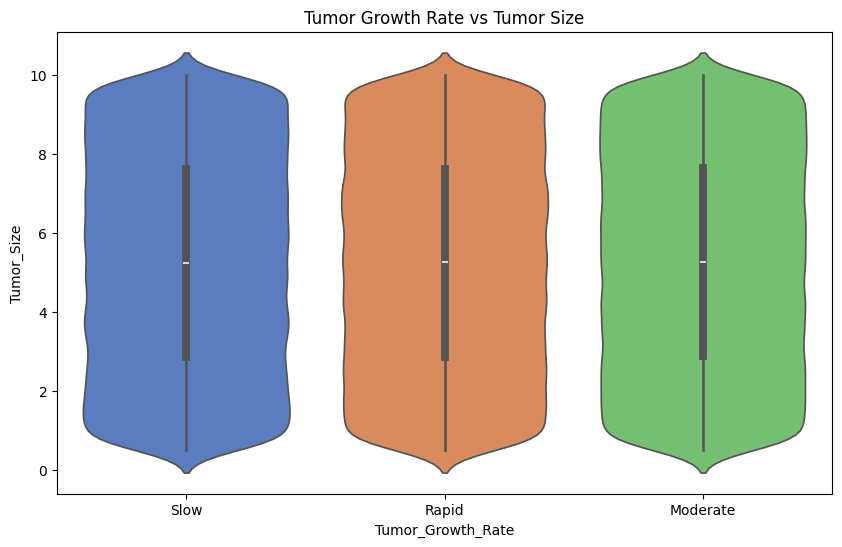

In [15]:
### 1. Histogram of Numerical Features ###
numerical_cols = ['Age', 'Tumor_Size', 'Survival_Rate(%)']
plt.figure(figsize=(15,5))
for i, col  in enumerate(numerical_cols, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df[col], bins=30, kde= True, color = 'skyblue')
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
### 2. Count Plot for Categorical Features ###
categorical_cols = ['Gender', 'Tumor_Type', 'Treatment_Received']
plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_cols, 1):
  plt.subplot(1, 3, i)
  sns.countplot(data = df, x = col, palette = 'pastel')
  plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()
### 3. Box Plot: Tumor Size by Tumor Type ###
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x = 'Tumor_Type', y ='Tumor_Size', palette = 'Set2')
plt.title('Tumor Size by Tumor Type')
plt.xticks(rotation=0)
plt.show()
### 4. Scatter Plot: Tumor SIze vs Survival Rate ###
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Tumor_Size', y = 'Survival_Rate(%)', hue = 'Tumor_Type', palette='coolwarm', alpha = 0.7)
plt.title('Tumor Size vs Survival Rate')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Rate(%)')
plt.legend(title = 'Tumor Type', bbox_to_anchor=(1,1))
plt.show()
### 5. Bar Plot: Smoking History vs Tumor Type ###
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='Smoking_History', hue ='Tumor_Type', palette = 'viridis')
plt.title('Smoking History vs Tumor Type')
plt.xticks(rotation=0)
plt.show()
### 6. Violin Plot: Tumor Growth Rate vs Tumor Size ###
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x ='Tumor_Growth_Rate', y = 'Tumor_Size', palette = 'muted')
plt.title('Tumor Growth Rate vs Tumor Size')
plt.xticks(rotation=0)
plt.show()

# EDA: Correlation Analysis

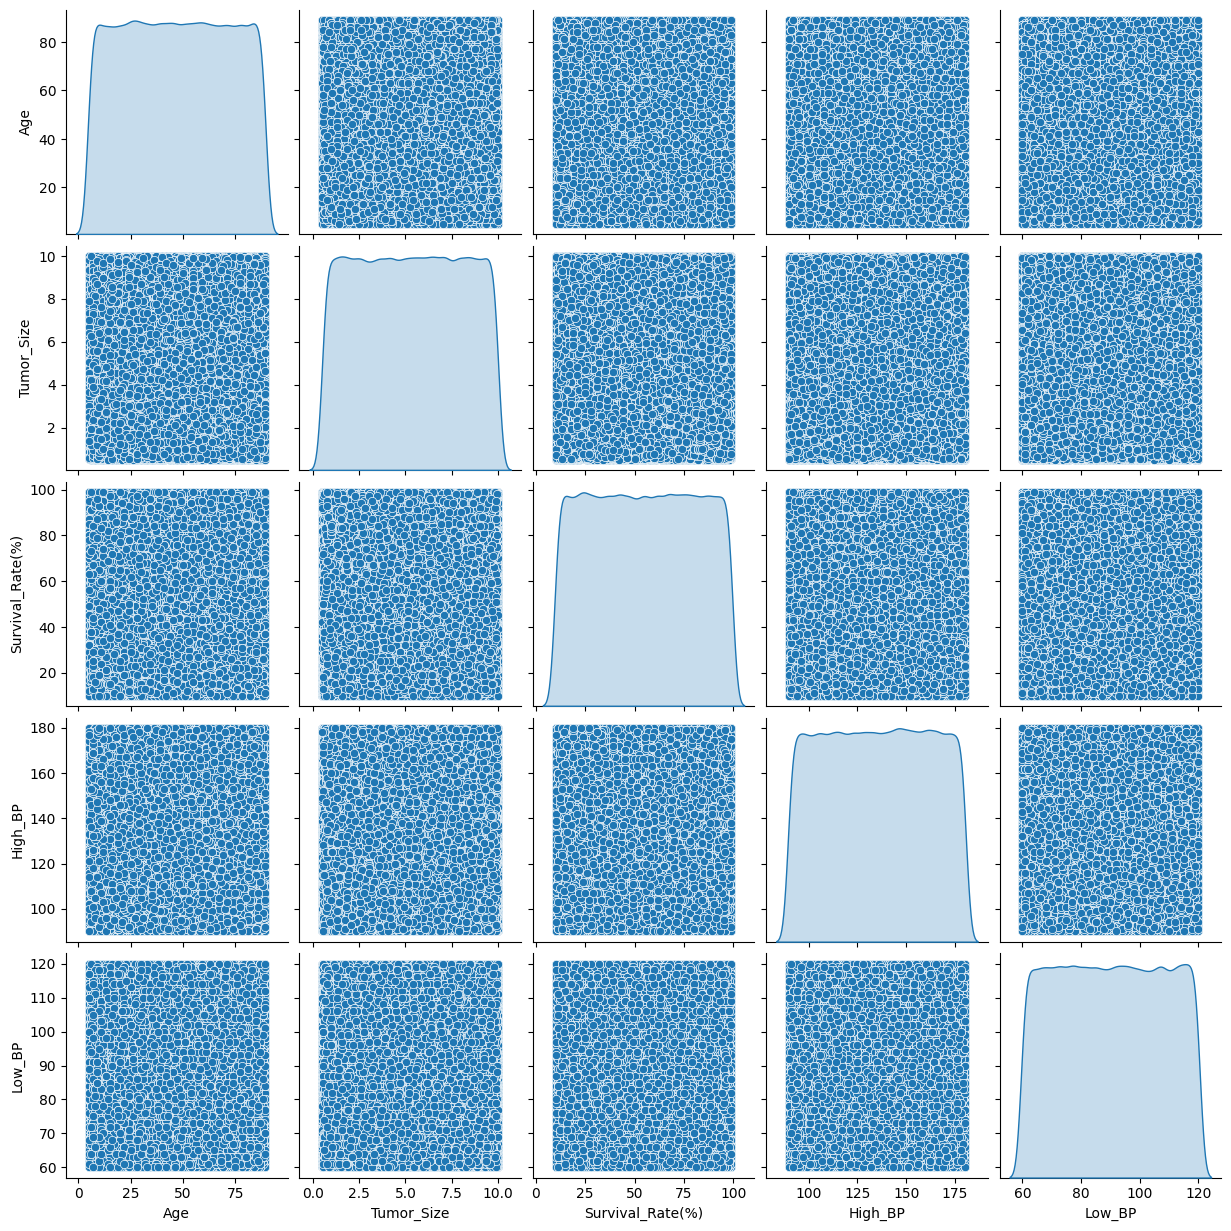

In [16]:
sns.pairplot(df[['Age', 'Tumor_Size', 'Survival_Rate(%)', 'High_BP'
, 'Low_BP']], diag_kind = 'kde')
plt.show()

In [17]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])
original_object_cols = list(label_encoders.keys())
num_columns = df.select_dtypes(include = ['int64', 'float64']).columns
num_columns_to_scale = [col for col in num_columns if col not in original_object_cols and col != 'Brain_Tumor_Present']
scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])
print('Scaled Numerical Data:')
df[num_columns_to_scale].head()

Scaled Numerical Data:


,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%),High_BP,Low_BP
0,0.776502,1.257299,1.062482,0.135326,-0.498807,-0.115998
1,1.633047,1.053111,0.514124,-1.595451,-0.346283,1.644008
2,-0.243195,0.280114,1.713659,0.481482,-0.651331,-1.421808
3,0.205472,0.732244,-1.062408,1.173793,1.140824,1.644008
4,1.510684,0.980187,-0.102780,-1.441604,0.797646,0.394972


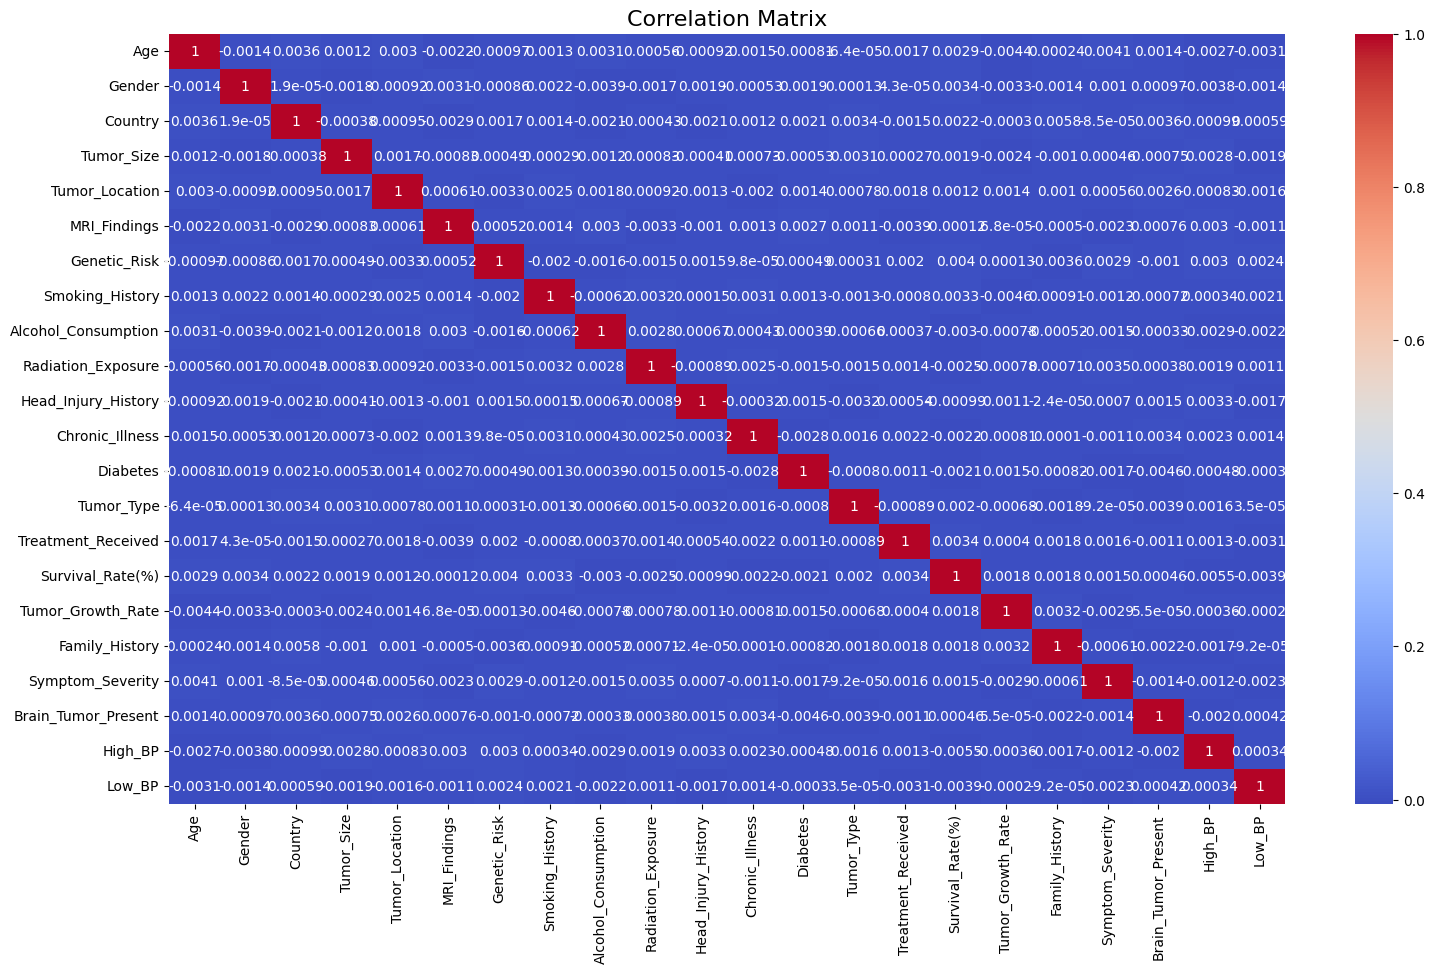

In [18]:
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
  label_encoders[column] = LabelEncoder()
  df[column] = label_encoders[column].fit_transform(df[column])
correlation_matrix = df.corr(method = 'pearson')
plt.figure(figsize = (18, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.title('Correlation Matrix', fontsize = 16)
plt.show()

**Since the correlation is close to zero, the prediction performance is expected to be poor**

# Comparison of Machine Learning Model Performance

In [23]:
x = df.drop('Brain_Tumor_Present', axis = 1)
y = df['Brain_Tumor_Present']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
models = {'Logistic Regression': LogisticRegression(max_iter= 10000, random_state=12),
          'KNN': KNeighborsClassifier(n_neighbors = 3),
          'Decision Tree': DecisionTreeClassifier(random_state = 42),
          #'Random Forest': RandomForestClassifier(n_estimators = 100, random_state = 42),
          'XGBoost': XGBClassifier(n_estimators = 100, random_state = 12)}
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
  recall = recall_score(y_test, y_pred, average = 'weighted', zero_division=0)
  f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division =0)
  return accuracy, precision, recall, f1


In [26]:
results = []
for name, model in models.items():
  accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
  results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})
  results_df = pd.DataFrame(results)
  results_df

In [27]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.50104,0.501009,0.50104,0.500567
1,KNN,0.49932,0.499318,0.49932,0.499318
2,Decision Tree,0.49734,0.497341,0.49734,0.497340
3,XGBoost,0.49764,0.497629,0.49764,0.497598


# Comparison of Deep Learning Model Performance

In [41]:
def plot_history(history, main_title):
  plt.figure(figsize=(12,6))
  plt.suptitle(main_title, fontsize=0, fontweight = 'bold')
  plt.subplot(1,2,1)
  plt.plot(history['accuracy'], label = 'Training Accuracy')
  plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
  plt.title('Accuracy', fontsize = 16)
  plt.xlabel('Epoch', fontsize = 12)
  plt.ylabel('Accuracy', fontsize = 12)
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history['loss'], label = 'Training Loss')
  plt.plot(history['val_loss'], label = 'Validation Loss')
  plt.title('Loss', fontsize = 16)
  plt.xlabel('Epoch', fontsize = 12)
  plt.ylabel('Loss', fontsize = 12)
  plt.legend()

  plt.tight_layout(rect = [0, 0, 1, 0.92])
  plt.show()

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [32]:
#NN Model
simple_nn = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
simple_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = simple_nn.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test), callbacks = [early_stopping])
test_lose, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.5004 - loss: 0.6982 - val_accuracy: 0.4969 - val_loss: 0.6935
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5052 - loss: 0.6933 - val_accuracy: 0.5022 - val_loss: 0.6933
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5050 - loss: 0.6930 - val_accuracy: 0.4994 - val_loss: 0.6933
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.5059 - loss: 0.6930 - val_accuracy: 0.4987 - val_loss: 0.6936
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5082 - loss: 0.6928 - val_accuracy: 0.5019 - val_loss: 0.6936
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5081 - loss: 0.6926 - val_accuracy: 0.4997 - val_loss: 0.6939
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5095 - loss: 0.6923 - val_accuracy: 0.4985 - val_loss: 0.6950
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5155 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Accuracy:0.5006


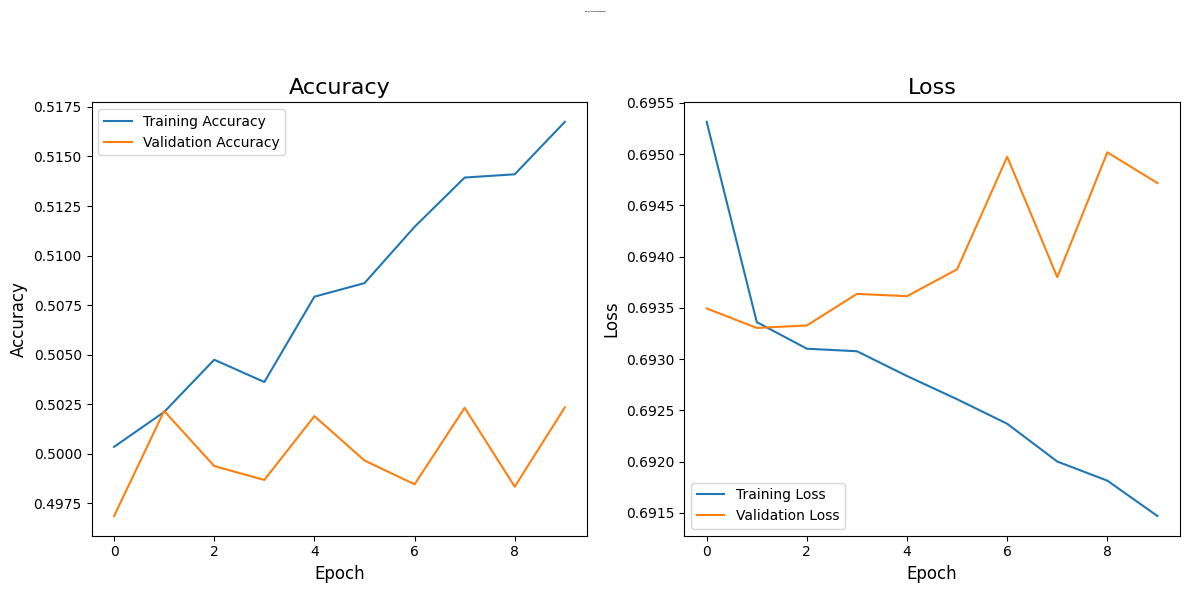

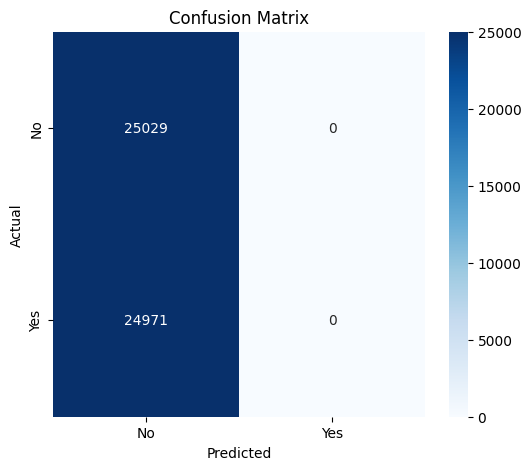

In [42]:
y_pred = simple_nn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy= accuracy_score(y_test, y_pred_classes)
print(f'Accuracy:{accuracy:.4f}')
plot_history(history.history, 'NN (2-class Classification)')
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize =(6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#DNN Model
dnn_model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])
dnn_model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
dnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [44]:
history = dnn_model.fit(
    X_train, y_train,
    epochs = 19,
    batch_size = 32,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping]
)
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.4986 - loss: 0.7178 - val_accuracy: 0.5026 - val_loss: 0.6934
Epoch 2/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.5010 - loss: 0.6936 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 3/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.5015 - loss: 0.6933 - val_accuracy: 0.4993 - val_loss: 0.6932
Epoch 4/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6931
Epoch 6/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5009 - val_loss: 0.6931
Epoch 7/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6931
Epoch 8/19
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.4978 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Accuracy:0.5006


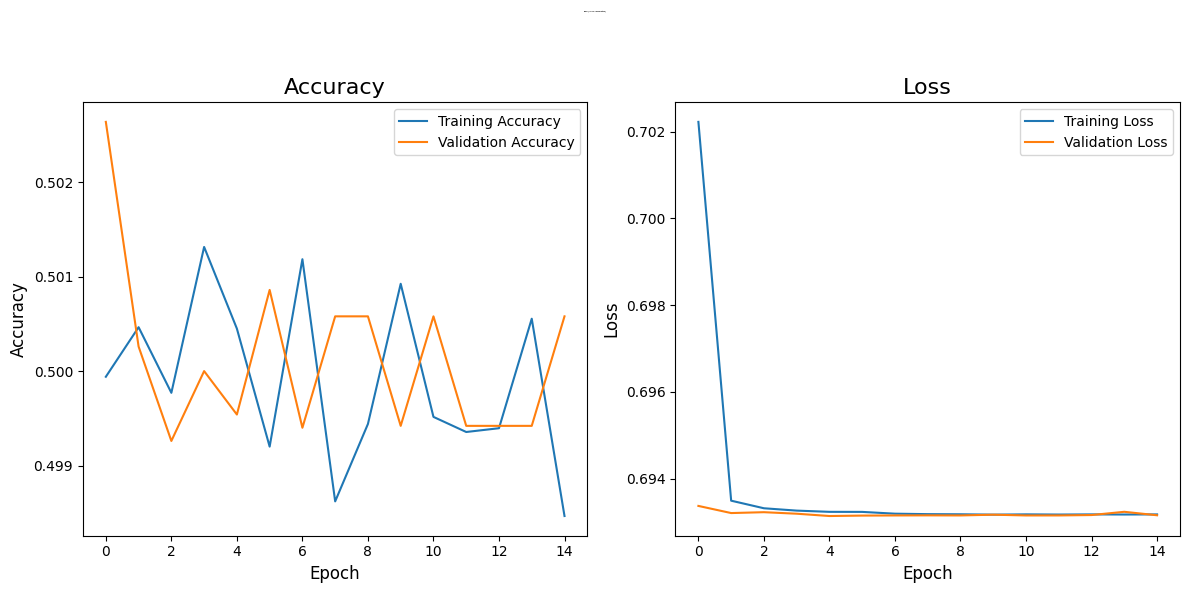

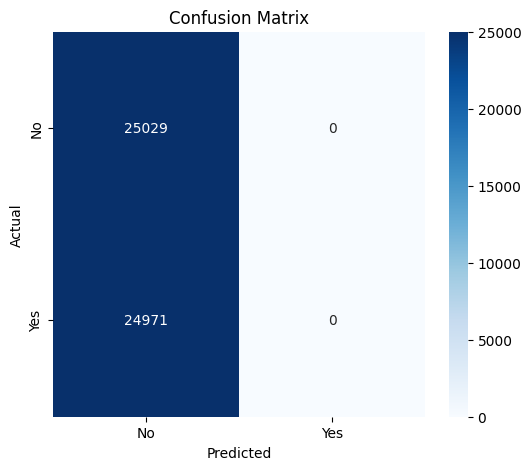

In [45]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy:{accuracy:.4f}')
plot_history(history.history, 'DNN (2-class Classification)')
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize =(6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
#ANN Model
ann_model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()
history = ann_model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping]
)
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.4992 - loss: 0.6997 - val_accuracy: 0.4982 - val_loss: 0.6932
Epoch 2/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4970 - loss: 0.6933 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 3/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 4/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 5/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 6/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 7/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 8/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4996 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy:0.5006


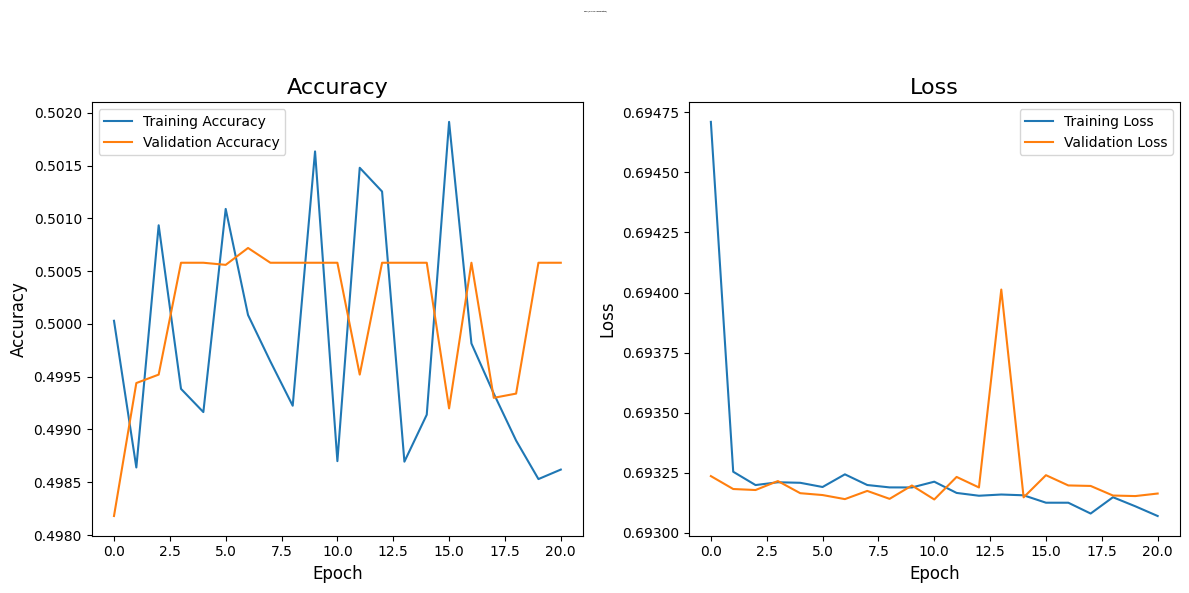

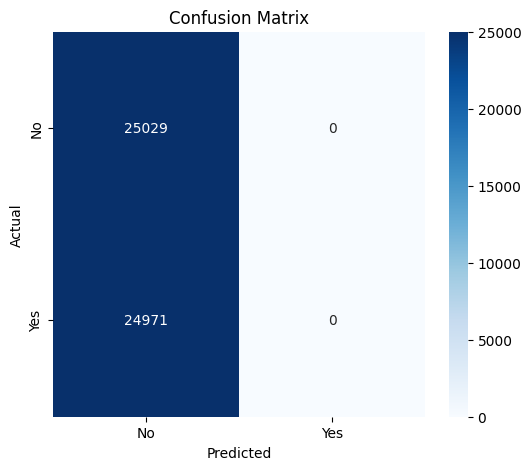

In [48]:
y_pred = ann_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy:{accuracy:.4f}')
plot_history(history.history, 'ANN (10-class Classification)')
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
#MLP Model
mlp_model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])
mlp_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
mlp_model.summary()
history = mlp_model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping]
)
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose = 0)
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.4969 - loss: 0.6987 - val_accuracy: 0.5007 - val_loss: 0.6932
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.5023 - loss: 0.6934 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.4991 - val_loss: 0.6931
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4985 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy:0.5006


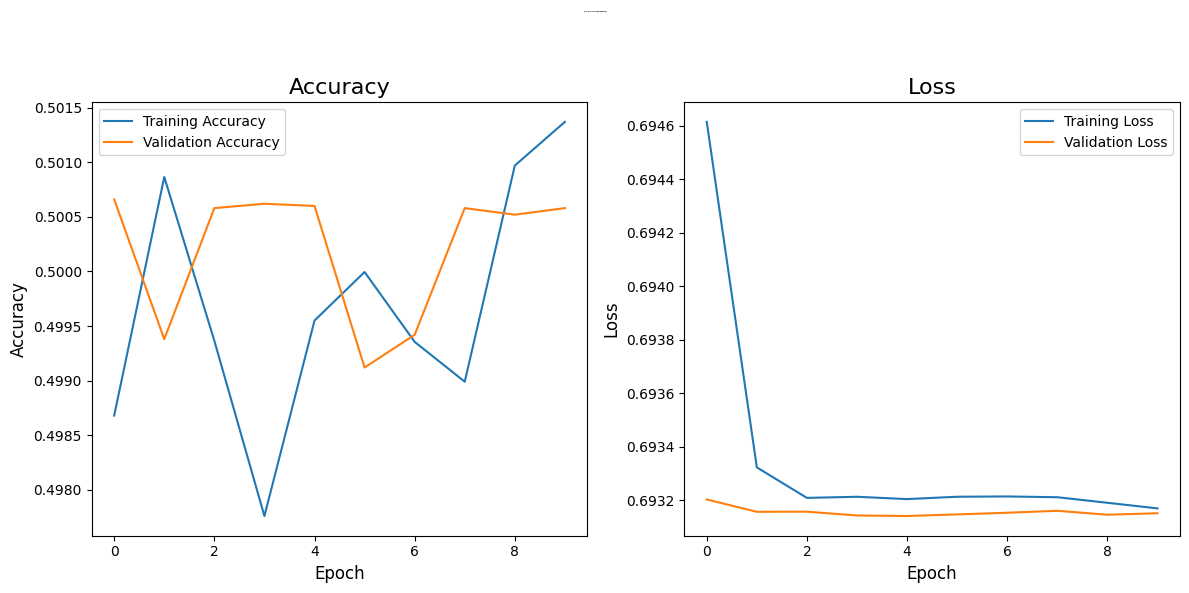

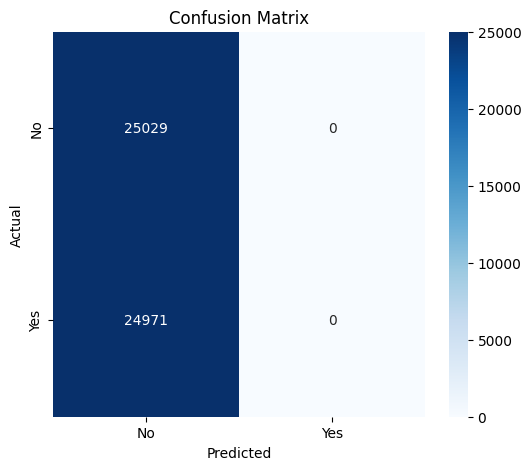

In [51]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy:{accuracy:.4f}')
plot_history(history.history, 'MLP (10-class Classification)')
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 19, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.5013 - loss: 0.6947 - val_accuracy: 0.5008 - val_loss: 0.6932
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.5050 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5030 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.4998 - val_loss: 0.6933
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.4984 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy:0.5006


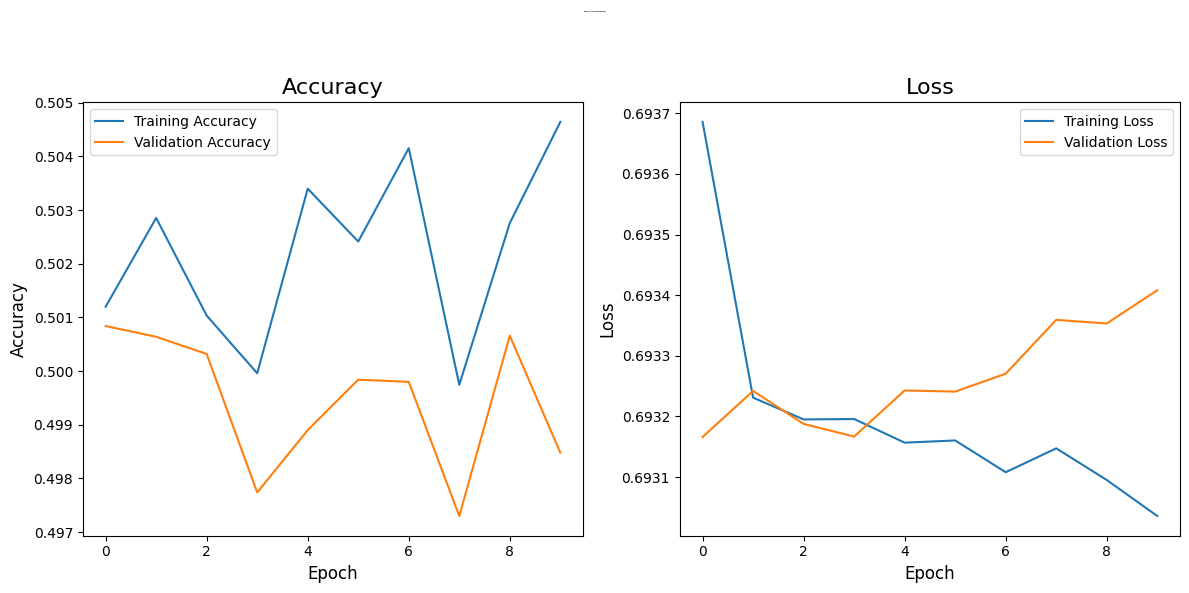

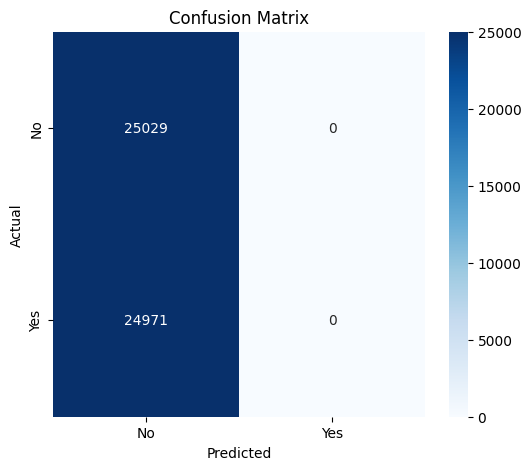

In [55]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy:{accuracy:.4f}')
plot_history(history.history, 'CNN (2-class Classification)')
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot =True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
def evaluate_model_on_test(model, X_test, y_test):
  if len(X_test.shape) == 2:
    x_test_input = X_test
  else:
    x_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1],1))
  y_pred_prob = model.predict(x_test_input, verbose = 0)
  y_pred = np.argmax(y_pred_prob,  axis = 1)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average= 'weighted', zero_division = 0)
  recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
  f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)
  return accuracy, precision, recall, f1
results_deep = []
model_dict = {
    'Simple NN': simple_nn,
    'DNN': dnn_model,
    'ANN': ann_model,
    'MLP': mlp_model,
    'CNN': cnn_model
}
for model_name, model in model_dict.items():
  acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
  results_deep.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})
  results_deep_df = pd.DataFrame(results_deep)

In [65]:
results_deep_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.50058,0.25058,0.50058,0.333978
1,DNN,0.50058,0.25058,0.50058,0.333978
2,ANN,0.50058,0.25058,0.50058,0.333978
3,MLP,0.50058,0.25058,0.50058,0.333978
4,CNN,0.50058,0.25058,0.50058,0.333978


# Conclusion


Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                 0.50104
Precision               0.501009
Recall                   0.50104
F1-Score                0.500567
Name: 0, dtype: object


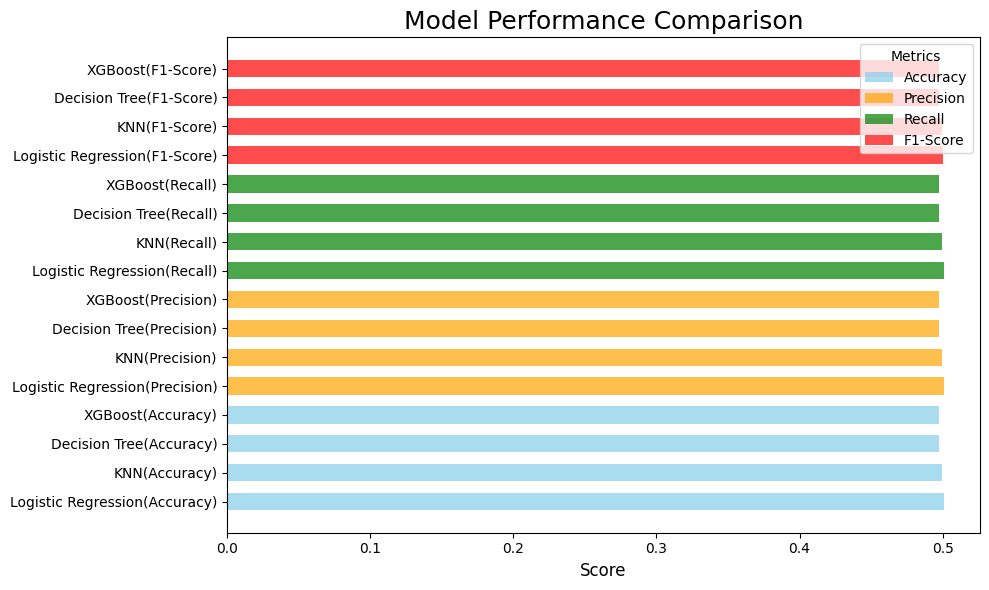


Optimal Model Based On Accuracy: Logistic Regression with Accuracy = 0.5010


In [72]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print('\nBest Model (Machine Learning):')
print(best_model)
metrics = [
 'Accuracy', 'Precision', 'Recall', 'F1-Score'
]
colors = ['skyblue', 'orange', 'green', 'red']
fig, ax = plt.subplots(figsize = (10, 6))
offset = 0.3
for i, metric in enumerate(metrics):
  ax.barh(results_df['Model'] + f'({metric})', results_df[metric],
          color = colors[i], alpha = 0.7, label = metric, height = 0.6)
ax.set_xlabel('Score', fontsize = 12)
ax.set_title('Model Performance Comparison', fontsize = 18)
ax.legend(title = 'Metrics')
plt.tight_layout()
plt.show()
print(f"\nOptimal Model Based On Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Simple NN
Accuracy       0.50058
Precision      0.25058
Recall         0.50058
F1-Score      0.333978
Name: 0, dtype: object


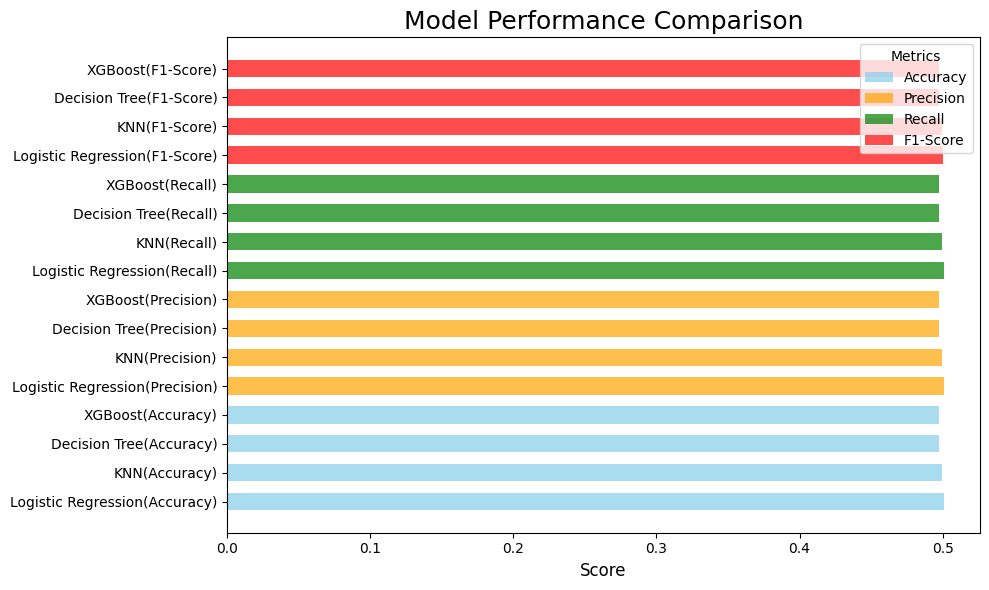


Optimal Model Based On Accuracy: Simple NN with Accuracy = 0.5006


In [76]:
best_model2 = results_deep_df.loc[results_df['Accuracy'].idxmax()]
print('\nBest Model (Deep Learning):')
print(best_model2)
metrics = [
 'Accuracy', 'Precision', 'Recall', 'F1-Score'
]
colors = ['skyblue', 'orange', 'green', 'red']
fig, ax = plt.subplots(figsize = (10, 6))
offset = 0.3
for i, metric in enumerate(metrics):
  ax.barh(results_df['Model'] + f'({metric})', results_df[metric],
          color = colors[i], alpha = 0.7, label = metric, height = 0.6)
ax.set_xlabel('Score', fontsize = 12)
ax.set_title('Model Performance Comparison', fontsize = 18)
ax.legend(title = 'Metrics')
plt.tight_layout()
plt.show()
print(f"\nOptimal Model Based On Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")